**Testing a landing gear geometry**

Criteria :
- correct balance between main landing gear (MLG) and nose landing gear (NLG)
- limited overturn angle to ensure sufficient taxiing stability on sharp turns
- enough ground clearance for the aft mounted propeller

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from input import *

- parameters

In [2]:
# free parameters
lg_height = 0.25
lg_nose_x = -1.0
lg_main_x = 0.3
lg_track = 0.75 # MLG wheel to wheel distance

tailstrike_margin = 0.5 # vertical margin preventing tailstrike


# previously computed :
fus_aft_x = 1.4 # from the formula used in the plot part of sizing_main.ipynb
cg_x = 0.1679167777535191 # cg x position, posiive rearwards

# can be computed within the function
gnd_z = lg_height + fus_height/2 # ground z position from ref point, positive downwards

- _overturn angle_

In [3]:
overturn_angle = np.arctan( \
    (gnd_z - cg_z) \
    / ((cg_x - lg_nose_x) * np.sin( np.arctan(lg_track / (2 * (lg_main_x - lg_nose_x))))) \
    )

print("overturn angle :", np.rad2deg(overturn_angle), "deg")
print("\tCriterion : < 63 deg")

overturn angle : 57.18519239561775 deg
	Criterion : < 63 deg


- charge sur roulette de nez

In [4]:
lg_nose_downforce = mtow * 9.81 * (lg_main_x - cg_x) / (lg_main_x - lg_nose_x)
print("NLG load fraction :", lg_nose_downforce / 9.81 / mtow * 100, "%")
print("\tCriterion : 8 % <    < 15 %")

NLG load fraction : 10.160247865113913 %
	Criterion : 8 % <    < 15 %


- _tipback angle_

In [5]:
tipback_angle = np.arctan((lg_main_x - cg_x)/(gnd_z - cg_z))
print("Tipback angle =", np.rad2deg(tipback_angle), "deg")
print("\tCriterion : > 15 deg")

Tipback angle = 14.741210101248239 deg
	Criterion : > 15 deg


- _tipback angle_ à la marge de _tailstrike_

In [6]:
h = gnd_z - prop_axis_z
D = fus_aft_x - lg_main_x
prop_radius = prop_diameter/2

OC = np.sqrt((h - prop_radius)**2 + D**2) # MLG to propeller tip distance

tipback_limit = np.arcsin(tailstrike_margin/OC) - np.arctan((h - prop_radius)/D)
print("Tipback angle at tailstrike margin :", np.rad2deg(tipback_limit), "deg")

Tipback angle at tailstrike margin : 18.400982193612798 deg


- vue du dessus

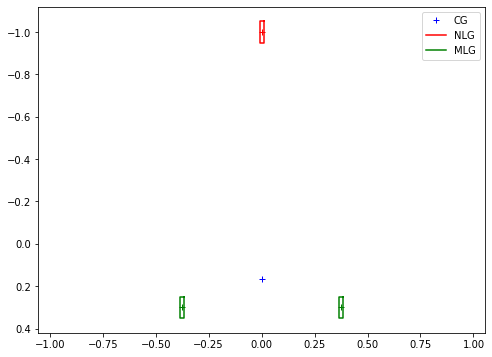

In [7]:
fig = plt.figure(figsize=(8, 6))#, dpi=100)
plt.plot(0, cg_x, 'b+', label='CG')

plt.plot(0, lg_nose_x, 'r+')
nosewheel_X = [ \
    lg_wheel_thickness/2, lg_wheel_thickness/2, \
    -lg_wheel_thickness/2, -lg_wheel_thickness/2, \
    lg_wheel_thickness/2]
nosewheel_Y = [ \
    lg_nose_x - lg_wheel_diam/2, lg_nose_x + lg_wheel_diam/2, \
    lg_nose_x + lg_wheel_diam/2, lg_nose_x - lg_wheel_diam/2, \
    lg_nose_x - lg_wheel_diam/2
    ]
plt.plot(nosewheel_X, nosewheel_Y, 'r-', label='NLG')

mainwheel_X = [ \
    lg_wheel_thickness/2, lg_wheel_thickness/2, \
    -lg_wheel_thickness/2, -lg_wheel_thickness/2, \
    lg_wheel_thickness/2]
mainwheel_X_right = [x + lg_track/2 for x in mainwheel_X]
mainwheel_X_left = [x - lg_track/2 for x in mainwheel_X]

mainwheel_Y = [ \
    lg_main_x - lg_wheel_diam/2, lg_main_x + lg_wheel_diam/2, \
    lg_main_x + lg_wheel_diam/2, lg_main_x - lg_wheel_diam/2, \
    lg_main_x - lg_wheel_diam/2
    ]

plt.plot(lg_track/2, lg_main_x, 'g+')
plt.plot(mainwheel_X_right, mainwheel_Y, 'g-')
plt.plot(-lg_track/2, lg_main_x, 'g+')
plt.plot(mainwheel_X_left, mainwheel_Y, 'g-', label='MLG')


plt.gca().invert_yaxis()
plt.axis('equal')
plt.legend()
plt.show()